what is Named entity recognition 
- nlp task to identify important named entities in the text
	- people, places, organizations
	- Dates, states, works of art 
	- ..and other categories!
    
   https://keep-steady.tistory.com/20

In [1]:
from sklearn.datasets import fetch_20newsgroups
article = fetch_20newsgroups(subset='train')['data'][:10]

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [2]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\likeo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [15]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\likeo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [3]:
articles=article[0] + article[1] + article[2] + article[3] +article[4] +article[5] +article[6] +article[7] +article[7] +article[8]

In [4]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(articles)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Maryland/NNP)
(NE College/NNP Park/NNP Lines/NNP)
(NE Bricklin/NNP)
(NE Lerxst/NNP)
(NE Guy/NNP Kuo/NNP)
(NE Final/NNP Call/NNP)
(NE Washington/NNP Lines/NNPS)
(NE Please/NNP)
(NE CPU/NNP)
(NE Guy/NNP Kuo/NNP)
(NE Thomas/NNP)
(NE
  Purdue/NNP
  University/NNP
  Engineering/NNP
  Computer/NNP
  Network/NNP
  Distribution/NNP)
(NE Joe/NNP Green/NNP)
(NE Weitek/NNP P9000/NNP)
(NE Organization/NN)
(NE Harris/NNP Computer/NNP Systems/NNPS Division/NNP Lines/NNPS)
(NE TIN/NNP)
(NE Robert/NNP)
(NE Weitek/NNP P9000/NNP)
(NE Weitek/NNP)
(NE Joe/NNP Green/NNP Harris/NNP Corporation/NNP)
(NE Computer/NNP Systems/NNPS Division/NNP)
(NE Jonathan/NNP)
(NE Smithsonian/JJ Astrophysical/NNP Observatory/NNP)
(NE Cambridge/NNP)
(NE MA/NNP)
(NE USA/NNP Distribution/NNP)
(NE ETRAT/NNP)
(NE Pack/NNP Rat/NNP)
(NE Verify/NNP)
(NE Sorry/NNP)
(NE Jonathan/NN From/IN)
(NE Foxvog/NNP Douglas/NNP)
(NE Second/NNP Amendment/NNP)
(NE VTT/NNP Lines/NNPS)
(NE Foxvog/NNP Douglas/NNP)
(NE John/NNP Lawrence/NNP Rutled

In [5]:
from collections import defaultdict
import matplotlib.pyplot as plt

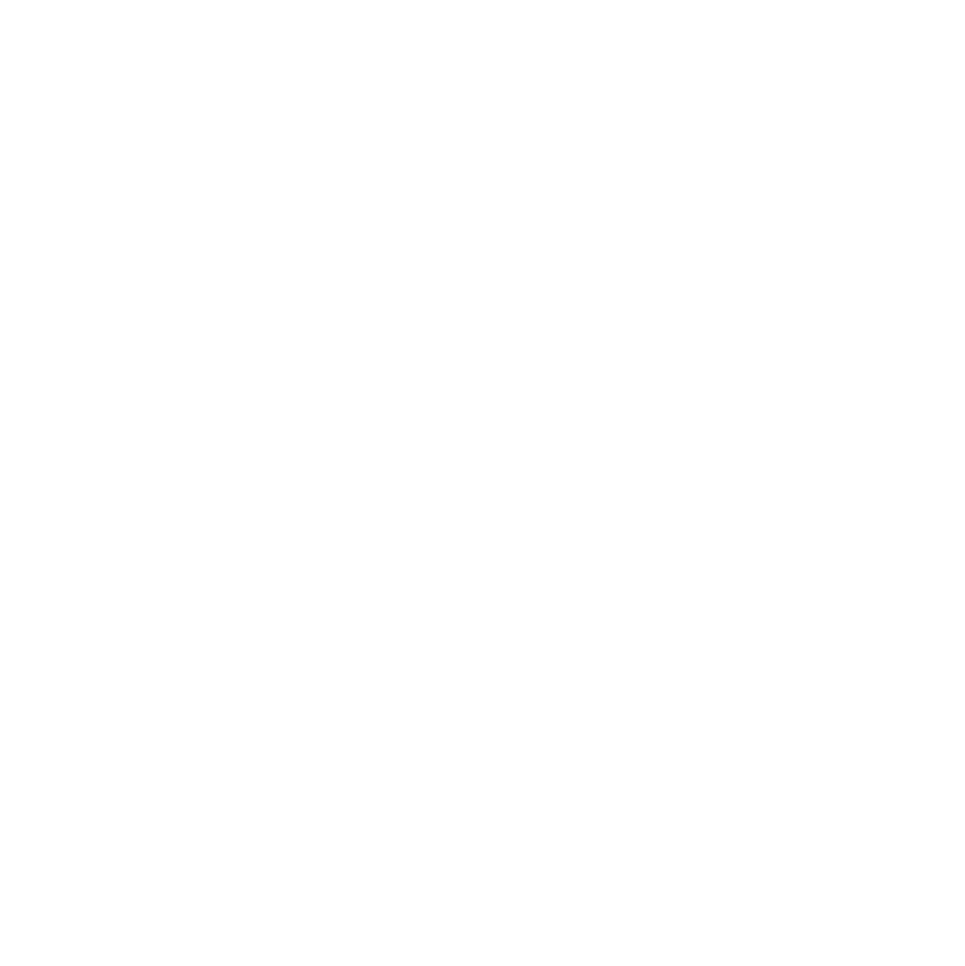

In [6]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

what is spacy?
- nlp library similar to gensim, with different implementations
- focus on creating nlp pipelines to generate models and corpora

why use spacy for NER?
- easy pipeline creation
- different entity types compared to nltk
- imformal language corpora
	- easily find entities in tweets and chat message
- quickly growing!

#### Comparing NLTK with spaCy NER


In [7]:
import spacy

In [11]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger = False, parser = False,
                matcher = False)

In [12]:
# Create a new document: doc
doc = nlp(articles)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

CARDINAL 15
DATE the other day
QUANTITY 2-door
DATE early 70s
PRODUCT Bricklin
DATE years
PERSON Lerxst
PERSON Guy Kuo
ORG SI
ORG SI
ORG shelley.1qvfo9INNc3s
Organization:
CARDINAL 11
ORG SI
TIME hour
CARDINAL 800
MONEY 1.4 m floppies
DATE the next two days
PERSON Guy Kuo
PERSON Thomas E Willis
ORG PB
ORG Purdue University Engineering Computer Network

CARDINAL 36
DATE this weekend
CARDINAL 512k
DATE 1985
CARDINAL 160
CARDINAL 180
FAC 185c
DATE this summer
CARDINAL 180
CARDINAL 180
CARDINAL 80Mb
CARDINAL 120
CARDINAL 160
CARDINAL 180
PERSON Tom Willis
FAC Purdue Electrical Engineering
PERSON jgreen@amber
PERSON Joe Green
PERSON Weitek P9000
CARDINAL 14
CARDINAL 1.1
PRODUCT PL9
PERSON Robert J.C. Kyanko
PERSON UUCP
GPE Weitek
CARDINAL four
ORG Weitek
PERSON Joe Green				
PERSON -- Jonathan Winters

PERSON Jonathan McDowell
ORG Smithsonian Astrophysical Observatory
GPE Cambridge
GPE MA
CARDINAL 23
PERSON Tom A Baker
ORG Verify
PERSON tom
CARDINAL 213
PERSON Foxvog Douglas
LAW the Second 